# KNN Titanic Survival

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df = pd.read_csv('Data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape


(889, 12)

In [12]:
df = df.drop(['PassengerId','Cabin', 'Ticket', 'Name'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
lab = preprocessing.LabelEncoder()
df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [34]:

def prediction(n):
    x = df.drop(['Pclass'],axis=1)
    y = df['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=25)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 268
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8576779026217228
Confusion matrix when k is 1  
 [[ 61   7   1]
 [  7  36   9]
 [  0  14 132]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8239700374531835
Confusion matrix when k is 2  
 [[ 63   5   1]
 [ 12  37   3]
 [  2  24 120]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.846441947565543
Confusion matrix when k is 3  
 [[ 63   5   1]
 [  7  36   9]
 [  2  17 127]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.797752808988764
Confusion matrix when k is 4  
 [[ 62   6   1]
 [ 10  34   8]
 [  3  26 117]]
--------------------------------------------

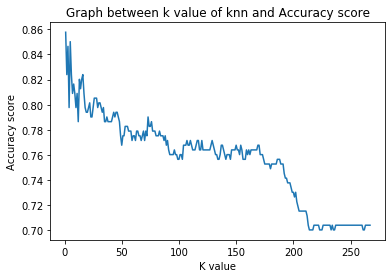

In [35]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)